# **PCA and PCR Analysis**

Challenge Overview and more data description: [House Prices - Advanced Regression Techniques](https://www.kaggle.com/competitions/house-prices-advanced-regression-techniques)

Worked by: 
- Santiago Arévalo Valencia
- Gilmar Andrés Amezquita
- Jhan Carlos Carvajal

### Libraries Imports

In [1]:
# Data manipulation
# ==============================================================================
import numpy as np
import pandas as pd
import statsmodels.api as sm

# Graphics
# ==============================================================================
import matplotlib.pyplot as plt
import matplotlib.font_manager
from matplotlib import style
style.use('ggplot') or plt.style.use('ggplot')

# Preprocessing, modeling and metrics
# ==============================================================================
from sklearn.decomposition import PCA
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import multiprocessing

# Warnings configuration
# ==============================================================================
import warnings
warnings.filterwarnings('ignore')

### Data Upload

In [16]:
# The aim is to train a model with the objective of predicting home sales prices.
# ==============================================================================

train_df = pd.read_csv('https://raw.githubusercontent.com/santiagoarevalo/artificial_intelligence/PCR-Analysis/train.csv')
test_df = pd.read_csv('https://raw.githubusercontent.com/santiagoarevalo/artificial_intelligence/PCR-Analysis/test.csv')

### First View of Data

In [17]:
train_df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [18]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

### Mean Value and Dispersion of Data

In [5]:
# Mean of each variable
print('----------------------')
print('Media de cada variable')
print('----------------------')
train_df.mean(axis = 0)

# Variance of each variable
print('-------------------------')
print('Varianza de cada variable')
print('-------------------------')
train_df.var(axis = 0)

----------------------
Media de cada variable
----------------------
-------------------------
Varianza de cada variable
-------------------------


Id               1.777550e+05
MSSubClass       1.789338e+03
LotFrontage      5.897492e+02
LotArea          9.962565e+07
OverallQual      1.912679e+00
OverallCond      1.238322e+00
YearBuilt        9.122154e+02
YearRemodAdd     4.262328e+02
MasVnrArea       3.278497e+04
BsmtFinSF1       2.080255e+05
BsmtFinSF2       2.602391e+04
BsmtUnfSF        1.952464e+05
TotalBsmtSF      1.924624e+05
1stFlrSF         1.494501e+05
2ndFlrSF         1.905571e+05
LowQualFinSF     2.364204e+03
GrLivArea        2.761296e+05
BsmtFullBath     2.692682e-01
BsmtHalfBath     5.700283e-02
FullBath         3.035082e-01
HalfBath         2.528937e-01
BedroomAbvGr     6.654938e-01
KitchenAbvGr     4.854892e-02
TotRmsAbvGrd     2.641903e+00
Fireplaces       4.155947e-01
GarageYrBlt      6.095825e+02
GarageCars       5.584797e-01
GarageArea       4.571251e+04
WoodDeckSF       1.570981e+04
OpenPorchSF      4.389861e+03
EnclosedPorch    3.735550e+03
3SsnPorch        8.595059e+02
ScreenPorch      3.108889e+03
PoolArea  

## **Data Cleaning**

#### *Dropping categorial variables*

In [19]:
#Delete the id column
train_df = train_df.drop(columns=['Id'])

# Identify the categorical variables with data type 'object' and delete them
df_temp = train_df.copy()
non_numeric = df_temp.select_dtypes(include=['object'])
df_temp = df_temp.drop(columns=non_numeric)
df_temp.shape
df_temp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 37 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   int64  
 1   LotFrontage    1201 non-null   float64
 2   LotArea        1460 non-null   int64  
 3   OverallQual    1460 non-null   int64  
 4   OverallCond    1460 non-null   int64  
 5   YearBuilt      1460 non-null   int64  
 6   YearRemodAdd   1460 non-null   int64  
 7   MasVnrArea     1452 non-null   float64
 8   BsmtFinSF1     1460 non-null   int64  
 9   BsmtFinSF2     1460 non-null   int64  
 10  BsmtUnfSF      1460 non-null   int64  
 11  TotalBsmtSF    1460 non-null   int64  
 12  1stFlrSF       1460 non-null   int64  
 13  2ndFlrSF       1460 non-null   int64  
 14  LowQualFinSF   1460 non-null   int64  
 15  GrLivArea      1460 non-null   int64  
 16  BsmtFullBath   1460 non-null   int64  
 17  BsmtHalfBath   1460 non-null   int64  
 18  FullBath

#### *Identifying duplicates and null values*

In [20]:
dup = df_temp.duplicated().sum()
nan = df_temp.isna().sum()
print(nan)
print("Duplicated values: " + str(dup))

MSSubClass         0
LotFrontage      259
LotArea            0
OverallQual        0
OverallCond        0
YearBuilt          0
YearRemodAdd       0
MasVnrArea         8
BsmtFinSF1         0
BsmtFinSF2         0
BsmtUnfSF          0
TotalBsmtSF        0
1stFlrSF           0
2ndFlrSF           0
LowQualFinSF       0
GrLivArea          0
BsmtFullBath       0
BsmtHalfBath       0
FullBath           0
HalfBath           0
BedroomAbvGr       0
KitchenAbvGr       0
TotRmsAbvGrd       0
Fireplaces         0
GarageYrBlt       81
GarageCars         0
GarageArea         0
WoodDeckSF         0
OpenPorchSF        0
EnclosedPorch      0
3SsnPorch          0
ScreenPorch        0
PoolArea           0
MiscVal            0
MoSold             0
YrSold             0
SalePrice          0
dtype: int64
Duplicated values: 0


#### *Percentage of null values*

In [21]:
# Obtenemos el porcentaje de valores nulos en cada columna
null_percent = df_temp.isnull().sum().apply(lambda x: (x/len(df_temp))*100)

# Mostramos el resultado
print(null_percent)

MSSubClass        0.000000
LotFrontage      17.739726
LotArea           0.000000
OverallQual       0.000000
OverallCond       0.000000
YearBuilt         0.000000
YearRemodAdd      0.000000
MasVnrArea        0.547945
BsmtFinSF1        0.000000
BsmtFinSF2        0.000000
BsmtUnfSF         0.000000
TotalBsmtSF       0.000000
1stFlrSF          0.000000
2ndFlrSF          0.000000
LowQualFinSF      0.000000
GrLivArea         0.000000
BsmtFullBath      0.000000
BsmtHalfBath      0.000000
FullBath          0.000000
HalfBath          0.000000
BedroomAbvGr      0.000000
KitchenAbvGr      0.000000
TotRmsAbvGrd      0.000000
Fireplaces        0.000000
GarageYrBlt       5.547945
GarageCars        0.000000
GarageArea        0.000000
WoodDeckSF        0.000000
OpenPorchSF       0.000000
EnclosedPorch     0.000000
3SsnPorch         0.000000
ScreenPorch       0.000000
PoolArea          0.000000
MiscVal           0.000000
MoSold            0.000000
YrSold            0.000000
SalePrice         0.000000
d

#### *Dropping null values / Imputing*

In [22]:
# Drop rows from columns with less than 10% of null values. These are MasVnrArea and GarageYrBlt.
df_temp = df_temp.dropna(subset=['MasVnrArea'])
df_temp = df_temp.dropna(subset=['GarageYrBlt'])

# Average/mean of LotFrontage column
mean = df_temp['LotFrontage'].mean()

# Replace NaN values with the mean
df_temp['LotFrontage'] = df_temp['LotFrontage'].fillna(mean)

df_temp.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1371 entries, 0 to 1459
Data columns (total 37 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1371 non-null   int64  
 1   LotFrontage    1371 non-null   float64
 2   LotArea        1371 non-null   int64  
 3   OverallQual    1371 non-null   int64  
 4   OverallCond    1371 non-null   int64  
 5   YearBuilt      1371 non-null   int64  
 6   YearRemodAdd   1371 non-null   int64  
 7   MasVnrArea     1371 non-null   float64
 8   BsmtFinSF1     1371 non-null   int64  
 9   BsmtFinSF2     1371 non-null   int64  
 10  BsmtUnfSF      1371 non-null   int64  
 11  TotalBsmtSF    1371 non-null   int64  
 12  1stFlrSF       1371 non-null   int64  
 13  2ndFlrSF       1371 non-null   int64  
 14  LowQualFinSF   1371 non-null   int64  
 15  GrLivArea      1371 non-null   int64  
 16  BsmtFullBath   1371 non-null   int64  
 17  BsmtHalfBath   1371 non-null   int64  
 18  FullBath

## **Correlation between Variables**

In [23]:
# Correlation between numeric variables
# ==============================================================================

def tidy_corr_matrix(corr_mat):
    '''
    Función para convertir una matriz de correlación de pandas en formato tidy
    '''
    corr_mat = corr_mat.stack().reset_index()
    corr_mat.columns = ['variable_1','variable_2','r']
    corr_mat = corr_mat.loc[corr_mat['variable_1'] != corr_mat['variable_2'], :]
    corr_mat['abs_r'] = np.abs(corr_mat['r'])
    corr_mat = corr_mat.sort_values('abs_r', ascending=False)
    
    return(corr_mat)

corr_matrix = train_df.select_dtypes(include=['float64', 'int']) \
              .corr(method='pearson')
display(tidy_corr_matrix(corr_matrix).head(5))

,variable_1,variable_2,r,abs_r
987,GarageArea,GarageCars,0.882475,0.882475
951,GarageCars,GarageArea,0.882475,0.882475
209,YearBuilt,GarageYrBlt,0.825667,0.825667
893,GarageYrBlt,YearBuilt,0.825667,0.825667
829,TotRmsAbvGrd,GrLivArea,0.825489,0.825489


**Absolute Correlation > 0.8** which is a problem when using linear regression models.

Two linear models are fitted, one with all the predictors and the other with only some of the components obtained by PCA, in order to identify which of them is better able to predict the fat content of the meat based on the signals recorded by the spectrophotometer.

In [24]:
# Division of data into training and test sets
# ==============================================================================

X = df_temp.drop(columns=['SalePrice'])
y = df_temp['SalePrice']

X_train, X_test, y_train, y_test = train_test_split(
                                        X,
                                        y.values.reshape(-1,1),
                                        train_size   = 0.7,
                                        random_state = 1234,
                                        shuffle      = True
                                    )
X_train.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 959 entries, 991 to 867
Data columns (total 36 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     959 non-null    int64  
 1   LotFrontage    959 non-null    float64
 2   LotArea        959 non-null    int64  
 3   OverallQual    959 non-null    int64  
 4   OverallCond    959 non-null    int64  
 5   YearBuilt      959 non-null    int64  
 6   YearRemodAdd   959 non-null    int64  
 7   MasVnrArea     959 non-null    float64
 8   BsmtFinSF1     959 non-null    int64  
 9   BsmtFinSF2     959 non-null    int64  
 10  BsmtUnfSF      959 non-null    int64  
 11  TotalBsmtSF    959 non-null    int64  
 12  1stFlrSF       959 non-null    int64  
 13  2ndFlrSF       959 non-null    int64  
 14  LowQualFinSF   959 non-null    int64  
 15  GrLivArea      959 non-null    int64  
 16  BsmtFullBath   959 non-null    int64  
 17  BsmtHalfBath   959 non-null    int64  
 18  FullBath

Two linear models are fitted, one with all the predictors and the other with only some of the components obtained by PCA, in order to identify which of them is better able to predict the selling price.

In [26]:
# Creation and training of the model
# ==============================================================================
# Solve this error: Input contains NaN, infinity or a value too large for dtype('float64')

modelo = LinearRegression()
modelo.fit(X = X_train, y = y_train)

LinearRegression()

In [27]:
# Test predictions
# ==============================================================================
predicciones = modelo.predict(X=X_test)
predicciones = predicciones.flatten()

# Model test error
# ==============================================================================
rmse_ols = mean_squared_error(
            y_true  = y_test,
            y_pred  = predicciones,
            squared = False
           )
print("")
print(f"El error (rmse) de test es: {rmse_ols}")


El error (rmse) de test es: 45864.35082896595


In [28]:
# Training regression model preceded by PCA with scaling
# ==============================================================================

pipe_modelado = make_pipeline(StandardScaler(), PCA(), LinearRegression())
pipe_modelado.fit(X=X_train, y=y_train)

Pipeline(steps=[('standardscaler', StandardScaler()), ('pca', PCA()),
                ('linearregression', LinearRegression())])

In [29]:
pipe_modelado.set_params

<bound method Pipeline.set_params of Pipeline(steps=[('standardscaler', StandardScaler()), ('pca', PCA()),
                ('linearregression', LinearRegression())])>

In [30]:
# Test predictions
# ==============================================================================
predicciones = pipe_modelado.predict(X=X_test)
predicciones = predicciones.flatten()

# Model test error
# ==============================================================================
rmse_pcr = mean_squared_error(
            y_true  = y_test,
            y_pred  = predicciones,
            squared = False
           )
print("")
print(f"El error (rmse) de test es: {rmse_pcr}")


El error (rmse) de test es: 45883.117561794264


In [31]:
# Grid of evaluated hyperparameters
# ==============================================================================
param_grid = {'pca__n_components': [1, 2, 4, 6, 8, 10, 15, 20, 30, 50]}

# Grid search with cross validation
# ==============================================================================
grid = GridSearchCV(
        estimator  = pipe_modelado,
        param_grid = param_grid,
        scoring    = 'neg_root_mean_squared_error',
        n_jobs     = multiprocessing.cpu_count() - 1,
        cv         = KFold(n_splits=5, random_state=123,shuffle=True), 
        refit      = True,
        verbose    = 0,
        return_train_score = True,
        

       )

grid.fit(X = X_train, y = y_train)

# Resultados
# ==============================================================================
results = pd.DataFrame(grid.cv_results_)
results.filter(regex = '(param.*|mean_t|std_t)') \
    .drop(columns = 'params') \
    .sort_values('mean_test_score', ascending = False) \
    .head(3)

,param_pca__n_components,mean_test_score,std_test_score,mean_train_score,std_train_score
6,15,-37727.474610,8138.616374,-34943.842888,1751.566686
4,8,-37957.112368,7540.742323,-36379.965298,2138.383080
8,30,-38069.774562,9839.877611,-31328.529787,1620.130636


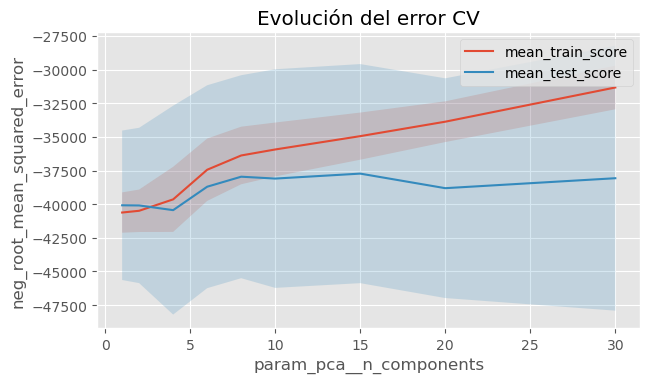

In [32]:
# Cross-validation results graph for each hyperparameter
# ==============================================================================
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(7, 3.84), sharey=True)

results.plot('param_pca__n_components', 'mean_train_score', ax=ax)
results.plot('param_pca__n_components', 'mean_test_score', ax=ax)
ax.fill_between(results.param_pca__n_components.astype(np.float),
                results['mean_train_score'] + results['std_train_score'],
                results['mean_train_score'] - results['std_train_score'],
                alpha=0.2)
ax.fill_between(results.param_pca__n_components.astype(np.float),
                results['mean_test_score'] + results['std_test_score'],
                results['mean_test_score'] - results['std_test_score'],
                alpha=0.2)
ax.legend()
ax.set_title('Evolución del error CV')
ax.set_ylabel('neg_root_mean_squared_error');

In [33]:
# Best hyperparameters by cross-validation
# ==============================================================================
print("----------------------------------------")
print("Mejores hiperparámetros encontrados (cv)")
print("----------------------------------------")
print(grid.best_params_, ":", grid.best_score_, grid.scoring)

----------------------------------------
Mejores hiperparámetros encontrados (cv)
----------------------------------------
{'pca__n_components': 15} : -37727.474609682 neg_root_mean_squared_error


In [34]:
# Training regression model preceded by PCA with scaling
# ==============================================================================
pipe_modelado = make_pipeline(StandardScaler(), PCA(n_components=5), LinearRegression())
pipe_modelado.fit(X=X_train, y=y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('pca', PCA(n_components=5)),
                ('linearregression', LinearRegression())])

In [35]:
# Predicciones test
# ==============================================================================
predicciones = pipe_modelado.predict(X=X_test)
predicciones = predicciones.flatten()

# Error de test del modelo 
# ==============================================================================
rmse_pcr = mean_squared_error(
            y_true  = y_test,
            y_pred  = predicciones,
            squared = False
           )
print("")
print(f"El error (rmse) de test es: {rmse_pcr}")


El error (rmse) de test es: 41733.78036093673
